In [2]:
import pandas as pd


df = pd.read_csv('Extended_Employee_Performance_and_Productivity_Data.csv')


missing_values = df.isnull().sum()


total_missing = missing_values.sum()


print("Missing Values:")
print(missing_values)
print("\nTotal Missing Values:", total_missing)



Missing Values:
Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

Total Missing Values: 0


In [2]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

negative_values = (df[numeric_columns] < 0).sum()

negative_values = negative_values[negative_values > 0]


if negative_values.empty:
    print("no negative values found in numeric columns.")
else:
    print("Negative Values:")
    # Display the columns with negative values
    print("Columns with negative values:")
    print(negative_values)





no negative values found in numeric columns.


In [5]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [6]:
print(df.dtypes)

Employee_ID                      int64
Department                      object
Gender                          object
Age                              int64
Job_Title                       object
Hire_Date                       object
Years_At_Company                 int64
Education_Level                 object
Performance_Score                int64
Monthly_Salary                 float64
Work_Hours_Per_Week              int64
Projects_Handled                 int64
Overtime_Hours                   int64
Sick_Days                        int64
Remote_Work_Frequency            int64
Team_Size                        int64
Training_Hours                   int64
Promotions                       int64
Employee_Satisfaction_Score    float64
Resigned                          bool
dtype: object


In [7]:
df['Hire_Date'] = pd.to_datetime(df['Hire_Date'], errors='coerce')


In [6]:
min_age = df['Age'].min()
max_age = df['Age'].max()

print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")


Minimum age: 22
Maximum age: 60


In [7]:
print(df["Age"].describe())



count    100000.000000
mean         41.029410
std          11.244121
min          22.000000
25%          31.000000
50%          41.000000
75%          51.000000
max          60.000000
Name: Age, dtype: float64


In [10]:
invalid_salary = df[df['Monthly_Salary'] < 0]
print(f"\nSubzero Salaries:\n{invalid_salary[['Employee_ID', 'Monthly_Salary']]}")



Subzero Salaries:
Empty DataFrame
Columns: [Employee_ID, Monthly_Salary]
Index: []


In [11]:
from datetime import datetime
today = datetime.today()

future_hires = df[df['Hire_Date'] > today]
print(f"\nEmployees hired in the future:\n{future_hires[['Employee_ID', 'Hire_Date']]}")

old_hires = df[df['Hire_Date'] < '1950-01-01']
print(f"\nEmployees hired before 1950:\n{old_hires[['Employee_ID', 'Hire_Date']]}")



Employees hired in the future:
Empty DataFrame
Columns: [Employee_ID, Hire_Date]
Index: []

Employees hired before 1950:
Empty DataFrame
Columns: [Employee_ID, Hire_Date]
Index: []


In [14]:


print("\n (Gender):")
print(df['Gender'].unique())

print("\n(Education_Level):")
print(df['Education_Level'].unique())

print("\n (Department):")
print(df['Department'].unique())



 (Gender):
['Male' 'Female' 'Other']

(Education_Level):
['High School' 'Bachelor' 'Master' 'PhD']

 (Department):
['IT' 'Finance' 'Customer Support' 'Engineering' 'Marketing' 'HR'
 'Operations' 'Sales' 'Legal']


In [4]:

print(df.columns)




Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')


In [7]:
print(df[["Education_Level", "Years_At_Company", "Performance_Score"]].isnull().sum())

Education_Level      0
Years_At_Company     0
Performance_Score    0
dtype: int64


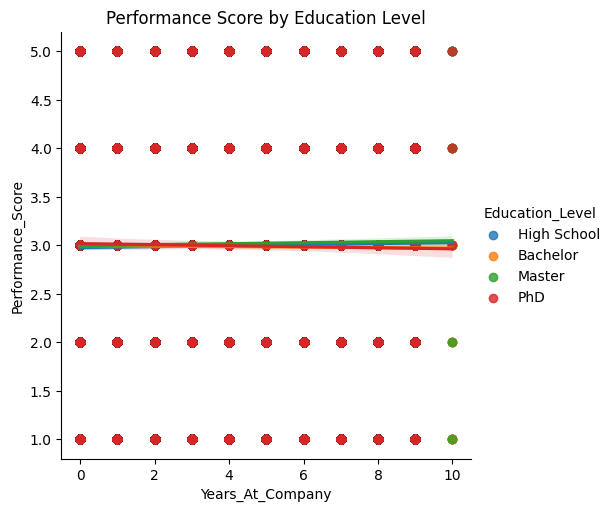

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Education Level vs Performance
sns.lmplot(data=df, x="Years_At_Company", y="Performance_Score", hue="Education_Level")

plt.title("Performance Score by Education Level")
plt.show()



In [11]:
from scipy.stats import f_oneway

groups = [group["Performance_Score"].values for name, group in df.groupby("Education_Level")]
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA p-value: {p_value}")


ANOVA p-value: 0.07123866486159823


In [ ]:
# Transform categorical variables into numerical
df_reg = df[["Performance_Score", "Education_Level", "Years_At_Company", "Age", "Training_Hours", "Promotions"]].copy()

#Delete rows with missing values
df_reg = df_reg.dropna()


df_reg = df_reg.apply(pd.to_numeric, errors='coerce')



In [ ]:
#Check if nan after to_numeric()
df_reg = df_reg.dropna()


In [20]:
print(df_reg.shape)
print(df_reg.head())


(0, 6)
Empty DataFrame
Columns: [Performance_Score, Education_Level, Years_At_Company, Age, Training_Hours, Promotions]
Index: []


In [21]:
education_map = {
    "High School": 1,
    "Associate": 2,
    "Bachelor": 3,
    "Master": 4,
    "PhD": 5
}

df["Education_Level"] = df["Education_Level"].map(education_map)


In [22]:
print(df["Education_Level"].isna().sum())


0


In [23]:

df_reg = df[["Performance_Score", "Education_Level", "Years_At_Company", "Age", "Training_Hours", "Promotions"]].copy()
df_reg = df_reg.dropna()


In [24]:
import statsmodels.api as sm

X = df_reg[["Education_Level", "Years_At_Company", "Age", "Training_Hours", "Promotions"]]
y = df_reg["Performance_Score"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Performance_Score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4602
Date:                Wed, 07 May 2025   Prob (F-statistic):              0.806
Time:                        15:20:17   Log-Likelihood:            -1.7659e+05
No. Observations:              100000   AIC:                         3.532e+05
Df Residuals:                   99994   BIC:                         3.532e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9828      0.023  